<a href="https://colab.research.google.com/github/Elizajr/CursoMetodosComputacionales/blob/main/Students/Jim%C3%A9nez_814/Lab10_ProblemaGeneral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab10_ProblemaGeneral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Taller de metodos computacionales

# Proyectiles con rozamiento y viento


Un proyectil es lanzado desde una posición (xo, yo), en presencia de viento y fuerza de fricción. Suponer que el efecto del viento sobre el proyectil es
el de una fuerza proporcional a la velocidad relativa entre el viento y el proyectil. Si $\vec{u} $ es la velocidad del viento y $\alpha$ el ángulo que hace direccion de esta velocidad con el eje x, se puede entrontrar las siguientes ecuaciones de movimiento:

\begin{equation}
m\frac{dv_x}{dt} = -mb(v_x-u\cos \alpha )\\
\frac{dv_x}{dt} = -b(v_x-u\cos \alpha )
\end{equation}

\begin{equation}
m\frac{dv_y}{dt} = -mg-mb(v_y-u\sin \alpha )\\
\frac{dv_y}{dt} =-g-b(v_y-u\sin \alpha )
\end{equation}


Para un proyectil lanzado con una rapidez $v_0$  y un ángulo $\theta_0$,
se enecuentra que la solución a la ecuación diferencial viene dada por:


Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

Ver imagen:  http://www.sc.ehu.es/sbweb/fisica3/fluidos/viento/parabolico.html


1. Escribir un programa en python que resuelva la ecuacion diferencial del movimiento del proeyctil y comprobar la solución con la solución teórica. Para ello realice una grafica de la trayectoria y comprueba que la soución numérica coincide con la solucion teórica. Compruebe su solución para $b=0.05$, $theta=60^{o}$, $u=v_0/2$, $\alpha=\pi$, $vo=50m/s$

In [143]:
from scipy.integrate import odeint
import numpy as np
import pylab as plt
from scipy.optimize import newton
import sympy as sy
from scipy.optimize import curve_fit

In [144]:
#-------------------------------------------------------------------------------
#    Condiciones iniciales
#-------------------------------------------------------------------------------
n = 1000

g = 9.8
b = 0.05
theta = np.rad2deg(60)
v0 = 50
u = v0/2
alpha = np.pi
y0 = 0
params = np.array([b, u, alpha])
ci = np.array([theta, y0, v0])

v0x = 50*np.cos(theta)
v0y = 50*np.sin(theta)
v0a = np.array([v0x,v0y])

In [145]:
def proyectil(v,t,params):
  vx, vy = v
  #theta,y,v = ci
  b, u, alpha = params
  dvx = -b* ( vx - u*np.cos(alpha))
  dvy = -g -b*( vy- u*np.sin(alpha))
  return np.array([dvx,dvy])

# Solucion teorica

In [146]:
def x(t,ci,params):
  b, u, alpha = params
  theta0,y0,v0 = ci
  return (u*np.cos(alpha))*t + (1/b)*(v0*np.cos(theta) - u*np.cos(alpha))*(1-np.exp(-b*t))

In [147]:
def y(t,ci,params):
  b, u, alpha = params
  theta0,y0,v0 = ci
  return (1/b)*((g/b)+v0*np.sin(theta) - u*np.sin(alpha))*(1-np.exp(-b*t)) - ((g/b) - u*np.sin(alpha))*t

In [148]:
t_ = sy.Symbol("t")
expry = (1/b)*((g/b)+v0*sy.sin(theta) - u*sy.sin(alpha))*(1-sy.exp(-b*t_)) - ((g/b) - u*sy.sin(alpha))*t_
dy_sy = sy.diff(expry,t_)
dyf = sy.lambdify(t_, dy_sy)

In [149]:
dy_sy

-196.0 + 233.378894564221*exp(-0.05*t)

In [150]:
dyfm = lambda t,ci, params: -196 + 233.378894564221*np.exp(-0.05*t)

In [151]:
tf = newton(y, 10, fprime = dyfm, args = (ci,params))
print(f"El tiempo de vuelo es igual a: {tf:.5}")

El tiempo de vuelo es igual a: 7.1976


In [152]:
t = np.linspace(0,tf,n)

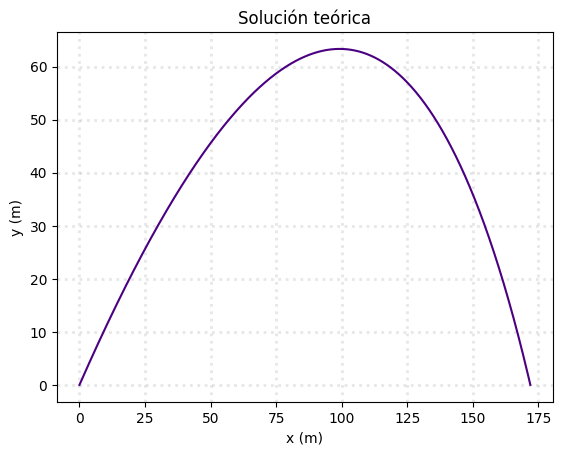

In [153]:
plt.figure()
plt.plot(x(t,ci,params),y(t,ci,params), c = "indigo")
plt.title("Solución teórica")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.grid(alpha = 0.3, linestyle = ":", linewidth = 2)
plt.show()

# Intentemos hacerla ahora

In [154]:
sol = odeint(proyectil,v0a, t, args = (params,))

In [155]:
vx, vy = sol.T

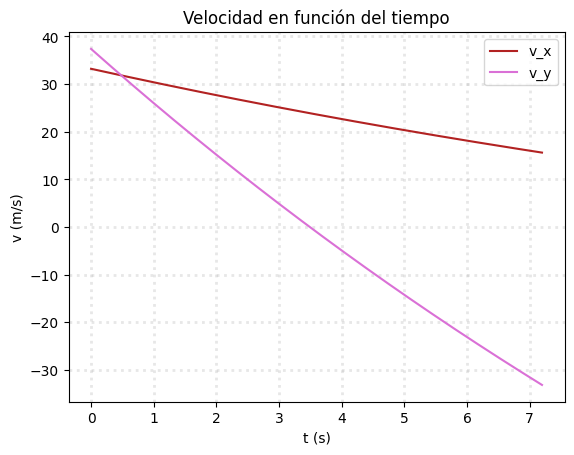

In [156]:
plt.figure()
plt.plot(t, vx, label =r"v_x", c = "firebrick")
plt.plot(t, vy, label =r"v_y", c = "orchid")
plt.legend()
plt.grid(alpha = 0.3, linestyle = ":", linewidth = 2)
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")
plt.title("Velocidad en función del tiempo")
plt.show()

Los métodos de integración vistos, me dan un único valor, pero como necesito un conjunto de datos, y puedo observar que la velocidad es lineal, voy a sacarle la ecuación de la recta para tener las funciones velocidad.

In [157]:
print(f"Punto 1: ({t[0]:.5}, {vx[0]:.5})")
print(f"Punto 2: ({t[n-1]:.5}, {vx[n-1]:.5})")

Punto 1: (0.0, 33.209)
Punto 2: (7.1976, 15.616)


In [158]:
#-------------------------------------------------------------------------------

mx = (vx[n-1] - vx[0])/(t[n-1] - t[0])
bx = vx[0] - mx*t[0]

vxf = lambda t: mx*t + b

#-------------------------------------------------------------------------------

my = (vy[n-1] - vy[0])/(t[n-1] - t[0])
by = vy[0] - my*t[0]

vyf = lambda t: my*t + b

#-------------------------------------------------------------------------------

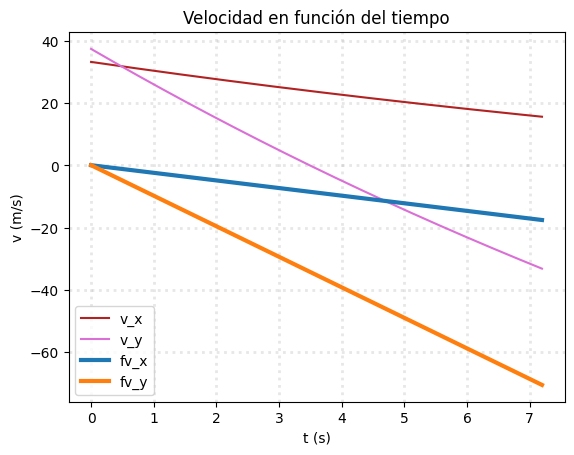

In [159]:
plt.figure()
plt.plot(t, vx, label =r"v_x", c = "firebrick")
plt.plot(t, vy, label =r"v_y", c = "orchid")
plt.plot(t, vxf(t), label = r"fv_x", linewidth =3)
plt.plot(t, vyf(t), label = r"fv_y", linewidth =3)
plt.legend()
plt.grid(alpha = 0.3, linestyle = ":", linewidth = 2)
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")
plt.title("Velocidad en función del tiempo")
plt.show()

Estas funciones aparentemente lineales no los son u.u

In [160]:
def fun(x,a,b,c):
  return a * x**2 + b * x + c

paramopt0= curve_fit(fun, t, vx)[0]

a0,b0,c0 = paramopt0

In [161]:
paramopt1= curve_fit(fun, t, vy)[0]

a1,b1,c1 = paramopt1

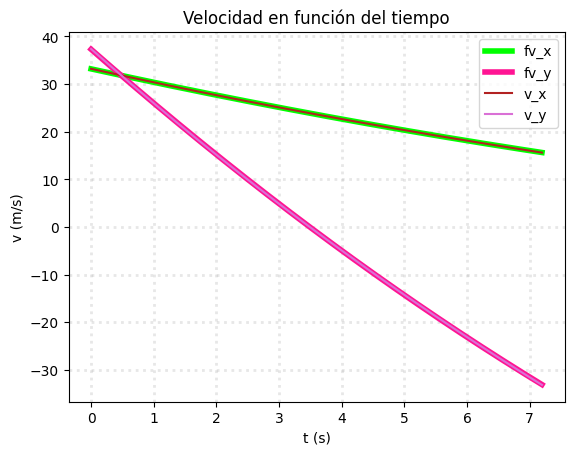

In [162]:
plt.figure()
plt.plot(t, fun(t,a0,b0,c0), label = r"fv_x", linewidth = 4 , c = "lime")
plt.plot(t, fun(t,a1,b1,c1), label = r"fv_y", linewidth = 4 , c = "deeppink")
plt.plot(t, vx, label =r"v_x", c = "firebrick")
plt.plot(t, vy, label =r"v_y", c = "orchid")


plt.legend()
plt.grid(alpha = 0.3, linestyle = ":", linewidth = 2)
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")
plt.title("Velocidad en función del tiempo")
plt.show()

In [163]:
def proyectil1(v,t,params):
  x,y, vx, vy = v
  #theta,y,v = ci
  b, u, alpha = params
  dx = vx
  dy = vy
  dvx = -b* ( vx - u*np.cos(alpha))
  dvy = -g -b*( vy- u*np.sin(alpha))
  return np.array([dx,dy,dvx,dvy])

In [164]:
ci0 = np.array([0,0,v0x,v0y])
sol = odeint(proyectil1,ci0, t, args = (params,))
xn,yn, vx, vy = sol.T

In [165]:
sol

array([[ 0.00000000e+00,  0.00000000e+00,  3.32087073e+01,
         3.73788946e+01],
       [ 2.39185622e-01,  2.69003580e-01,  3.31877421e+01,
         3.72948376e+01],
       [ 4.78220221e-01,  5.37401657e-01,  3.31667844e+01,
         3.72108110e+01],
       ...,
       [ 1.71694187e+02,  4.76935075e-01,  1.56450514e+01,
        -3.30398929e+01],
       [ 1.71806853e+02,  2.38678744e-01,  1.56304122e+01,
        -3.30985869e+01],
       [ 1.71919414e+02, -3.85885652e-07,  1.56157782e+01,
        -3.31572597e+01]])

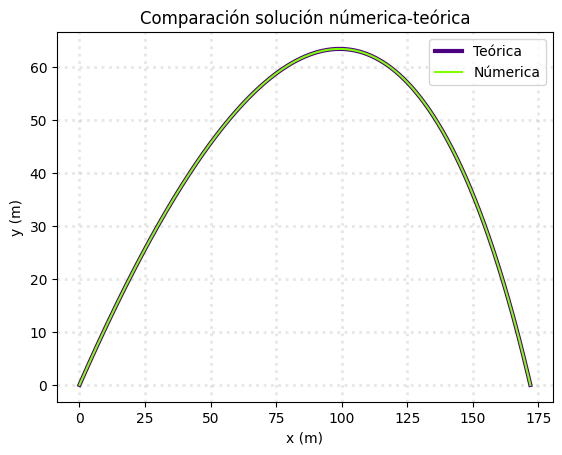

In [166]:
plt.figure()
plt.title("Comparación solución númerica-teórica")
plt.plot(x(t,ci,params),y(t,ci,params), c = "indigo", label = "Teórica", linewidth = 3)
plt.plot(xn,yn, c= "chartreuse", label = "Númerica")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.grid(alpha = 0.3, linestyle = ":", linewidth = 2)
plt.legend()
plt.show()

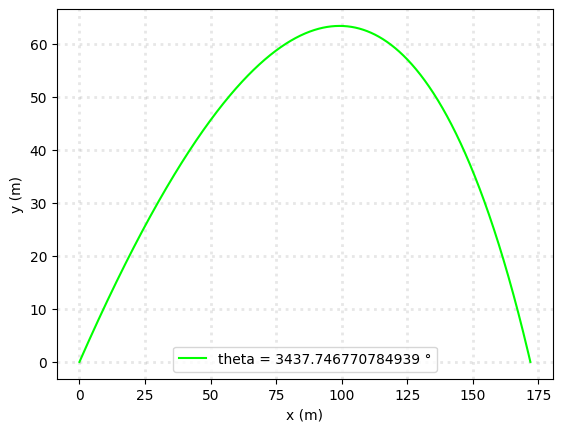

In [167]:
fig = plt.figure()
fig.add_subplot()
plt.plot(xn,yn, c = "lime", label = "theta = "+str(theta)+ " °")
plt.legend()
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.grid(alpha = 0.3, linestyle = ":", linewidth = 2)
plt.show()

# Generalización


In [174]:
def grafica(ci, params, n, color):
  #-----------------------------------------------------------------------------
  # Entradas
  #-----------------------------------------------------------------------------

  #params = b, u, alpha
  #ci = theta, x0, y0, v0
  #n = número de pasos
  theta = ci[0]
  ci[0] = np.deg2rad(ci[0])
  inicio = np.array([ci[1],ci[2],ci[3]*np.cos(ci[0]),ci[3]*np.sin(ci[0])])

  #-----------------------------------------------------------------------------
  # Edo
  #-----------------------------------------------------------------------------

  def proyectil(v,t,params):
    x,y, vx, vy = v
    #theta,y,v = ci
    b, u, alpha = params
    dx = vx
    dy = vy
    dvx = -b* ( vx - u*np.cos(alpha))
    dvy = -g -b*( vy- u*np.sin(alpha))
    return np.array([dx,dy,dvx,dvy])


  #-----------------------------------------------------------------------------
  # Tiempo de vuelo
  #-----------------------------------------------------------------------------

  # y teorica
  def y(t,ci,params):
    b, u, alpha = params
    theta0,x0,y0,v0 = ci
    return (1/b)*((g/b)+v0*np.sin(theta) - u*np.sin(alpha))*(1-np.exp(-b*t)) - ((g/b) - u*np.sin(alpha))*t

  dyfm = lambda t,ci, params: -196 + 233.378894564221*np.exp(-0.05*t)
  tf = newton(y, 10, fprime = dyfm, args = (ci,params))

  t = np.linspace(0,tf,n)

  #-----------------------------------------------------------------------------
  # Edo
  #-----------------------------------------------------------------------------

  sol = odeint(proyectil,inicio, t, args = (params,))
  xn, yn, vx, vy = sol.T

  #-----------------------------------------------------------------------------
  # Gráfica
  #-----------------------------------------------------------------------------

  fig = plt.figure()
  fig.add_subplot()
  plt.plot(xn,yn, c = color, label = "theta = "+str(theta)+ " °")
  plt.legend()
  plt.xlabel("x (m)")
  plt.ylabel("y (m)")
  plt.grid(alpha = 0.3, linestyle = ":", linewidth = 2)
  plt.show()

Problema.

4. Construya una  gráfica del alcance máximo R como función de $\theta$, varie $\theta$  entre 10 y 80 grados

5. Realice un ajuste a la curva construida en el apartado anterior.

6. Se denomina ángulo crítico, aquel  ángulo para el cual el alcance máximo es cero.  Para ello, se pide resolver el sistema no lineal de ecuaciones para $t$ y $\theta$  con  $x=0$, $y=0$. Representar para $\theta=0.9\theta_c$, $\theta=\theta_c$, $\theta=1.1\theta_c$.

7. Construya la trayectoria seguida por la partícula para $\theta=10^{o}, 15^{o}, 20^{o}, ...45^{o}$.

8. Determine el máximo de cada unas de las trayectorias anteriores, y construya una gráfica de los máximos como función del ángulo.


In [169]:
def max_alc(theta):
  ci[0] = theta
  tf = newton(y, 10, fprime = dyfm, args = (ci,params))
  return x(tf,ci,params)

In [170]:
theta_ar = np.linspace(10,80,100)
theta_ar = np.deg2rad(theta_ar)

alcance = np.zeros(100)

for i,m in enumerate(theta_ar):
  alcance[i] = max_alc(m)

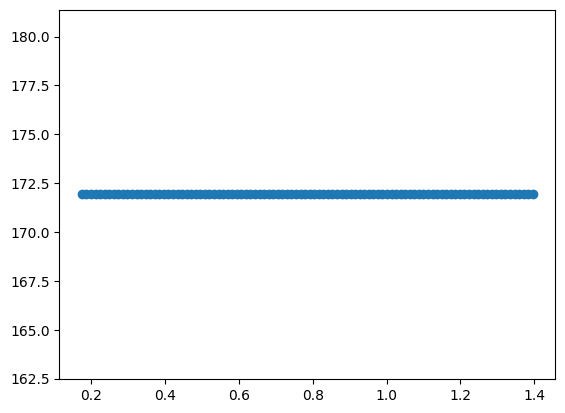

In [171]:
plt.figure()
plt.plot(theta_ar,alcance, "o")
plt.show()

In [172]:
hola = np.array([1,2,3])
hola[0] = 4
hola

array([4, 2, 3])